In [284]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, MFDataset
import xarray as xr
import pandas as pd

In [2]:
# Thomas K. favourites; 1) Low Resolution Sea Ice Drift
# ftp://osisaf.met.no/archive/ice/drift_lr/

In [3]:
# 2) AMSR-2 Global Sea Ice Concentration
# ftp://osisaf.met.no/prod/ice/conc_amsr/

### download data: sea ice drift velocities and concentration

In [4]:
# download latest drift velocities into folder 'drift-velocities'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P drift-velocities ftp://osisaf.met.no/archive/ice/drift_lr/merged/

2019-09-03 16:38:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/ [801] -> "drift-velocities/archive/ice/drift_lr/merged/.listing" [1]
2019-09-03 16:38:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/ [179] -> "drift-velocities/archive/ice/drift_lr/merged/2009/.listing" [1]
2019-09-03 16:38:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2009/12/ [3023] -> "drift-velocities/archive/ice/drift_lr/merged/2009/12/.listing" [1]
2019-09-03 16:38:22 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/ [839] -> "drift-velocities/archive/ice/drift_lr/merged/2010/.listing" [1]
2019-09-03 16:38:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/01/ [3870] -> "drift-velocities/archive/ice/drift_lr/merged/2010/01/.listing" [1]
2019-09-03 16:38:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2010/02/ [3507] -> "drift-velocities/archive/ice/drift_lr/merged/2010/02/.listing" [1]
2019-09-03 16:38:23 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merge

2019-09-03 16:38:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/10/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2013/10/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/11/ [7379] -> "drift-velocities/archive/ice/drift_lr/merged/2013/11/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2013/12/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2013/12/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/ [839] -> "drift-velocities/archive/ice/drift_lr/merged/2014/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/01/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2014/01/.listing" [1]
2019-09-03 16:38:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2014/02/ [6895] -> "drift-velocities/archive/ice/drift_lr/merged/2014/02/.listing" [1]
2019-09-03 16:38:33 URL: ftp://osisaf.met.no/ar

2019-09-03 16:38:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/10/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2017/10/.listing" [1]
2019-09-03 16:38:41 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/11/ [7379] -> "drift-velocities/archive/ice/drift_lr/merged/2017/11/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2017/12/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2017/12/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/ [839] -> "drift-velocities/archive/ice/drift_lr/merged/2018/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/01/ [7621] -> "drift-velocities/archive/ice/drift_lr/merged/2018/01/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2018/02/ [6895] -> "drift-velocities/archive/ice/drift_lr/merged/2018/02/.listing" [1]
2019-09-03 16:38:42 URL: ftp://osisaf.met.no/ar

2019-09-03 16:38:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907251200-201907271200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907251200-201907271200.nc" [1]
2019-09-03 16:38:54 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907261200-201907281200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907261200-201907281200.nc" [1]
2019-09-03 16:38:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907271200-201907291200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907271200-201907291200.nc" [1]
2019-09-03 16:38:55 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907281200-201907301200.nc [789356] -> "dr

2019-09-03 16:39:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908021200-201908041200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908021200-201908041200.nc" [1]
2019-09-03 16:39:09 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908031200-201908051200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908031200-201908051200.nc" [1]
2019-09-03 16:39:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908041200-201908061200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908041200-201908061200.nc" [1]
2019-09-03 16:39:10 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_nh_polstere-625_multi-oi_201908051200-201908071200.nc [789356] -> "dr

2019-09-03 16:39:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908011200-201908031200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908011200-201908031200.nc" [1]
2019-09-03 16:39:30 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908021200-201908041200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908021200-201908041200.nc" [1]
2019-09-03 16:39:31 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908031200-201908051200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908031200-201908051200.nc" [1]
2019-09-03 16:39:32 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/08/ice_drift_sh_polstere-625_multi-oi_201908041200-201908061200.nc [615580] -> "dr

2019-09-03 16:39:51 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201908301200-201909011200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201908301200-201909011200.nc" [1]
2019-09-03 16:39:52 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201908311200-201909021200.nc [789356] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_nh_polstere-625_multi-oi_201908311200-201909021200.nc" [1]
2019-09-03 16:39:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908301200-201909011200.nc [615580] -> "drift-velocities/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908301200-201909011200.nc" [1]
2019-09-03 16:39:53 URL: ftp://osisaf.met.no/archive/ice/drift_lr/merged/2019/09/ice_drift_sh_polstere-625_multi-oi_201908311200-201909021200.nc [615580] -> "dr

In [22]:
# download sea ice concentration into folder 'seaice-concentration'
!wget -nv --mirror --no-host-directories --user=anonymous --password=anonymous -P seaice-concentration ftp://osisaf.met.no/prod/ice/conc_amsr/

2019-07-12 14:12:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ [14111] -> "seaice-concentration/prod/ice/conc_amsr/.listing" [1]
2019-07-12 14:12:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906091200.nc" [1]
2019-07-12 14:13:02 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906101200.nc" [1]
2019-07-12 14:13:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906111200.nc" [1]
2019-07-12 14:13:35 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2-tud_201906121200.nc [20450452] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-

2019-07-12 17:46:28 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906121200.nc" [1]
2019-07-12 17:46:37 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906131200.nc" [1]
2019-07-12 17:46:46 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906141200.nc" [1]
2019-07-12 17:46:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc [20450448] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906151200.nc" [1]
2019-07-12 17:47:04 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_nh_polstere-100_amsr2_201906161200.nc [20450448] -> "se

2019-07-12 17:53:31 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906171200.nc" [1]
2019-07-12 17:53:38 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906181200.nc" [1]
2019-07-12 17:53:45 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906191200.nc" [1]
2019-07-12 17:53:53 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc [15756372] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-tud_201906201200.nc" [1]
2019-07-12 17:54:00 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2-t

2019-07-12 17:57:55 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906211200.nc" [1]
2019-07-12 17:58:03 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906221200.nc" [1]
2019-07-12 17:58:10 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906231200.nc" [1]
2019-07-12 17:58:17 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc [15756368] -> "seaice-concentration/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906241200.nc" [1]
2019-07-12 17:58:24 URL: ftp://osisaf.met.no/prod/ice/conc_amsr/ice_conc_sh_polstere-100_amsr2_201906251200.nc [15756368] -> "se

In [6]:
ls drift-velocities/archive/ice/drift_lr/merged/2019/07/

ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200.nc
ice_drift_nh_polstere-625_multi-oi_201906301200-201907021200.nc
ice_drift_nh_polstere-625_multi-oi_201907011200-201907031200.nc
ice_drift_nh_polstere-625_multi-oi_201907021200-201907041200.nc
ice_drift_nh_polstere-625_multi-oi_201907031200-201907051200.nc
ice_drift_nh_polstere-625_multi-oi_201907041200-201907061200.nc
ice_drift_nh_polstere-625_multi-oi_201907051200-201907071200.nc
ice_drift_nh_polstere-625_multi-oi_201907061200-201907081200.nc
ice_drift_nh_polstere-625_multi-oi_201907071200-201907091200.nc
ice_drift_nh_polstere-625_multi-oi_201907081200-201907101200.nc
ice_drift_nh_polstere-625_multi-oi_201907091200-201907111200.nc
ice_drift_nh_polstere-625_multi-oi_201907101200-201907121200.nc
ice_drift_nh_polstere-625_multi-oi_201907111200-201907131200.nc
ice_drift_nh_polstere-625_multi-oi_201907121200-201907141200.nc
ice_drift_nh_polstere-625_multi-oi_201907131200-201907151200.nc
ice_drift_nh_polstere-625_multi-oi_20190

In [7]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201906291200-201907011200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

### load data

In [42]:
!ncdump -h drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907291200-201907311200.nc

netcdf ice_drift_nh_polstere-625_multi-oi_201907291200-201907311200 {
dimensions:
	time = 1 ;
	nv = 2 ;
	xc = 119 ;
	yc = 177 ;
variables:
	int Polar_Stereographic_Grid ;
		Polar_Stereographic_Grid:grid_mapping_name = "polar_stereographic" ;
		Polar_Stereographic_Grid:straight_vertical_longitude_from_pole = -45.f ;
		Polar_Stereographic_Grid:latitude_of_projection_origin = 90.f ;
		Polar_Stereographic_Grid:standard_parallel = 70.f ;
		Polar_Stereographic_Grid:false_easting = 0.f ;
		Polar_Stereographic_Grid:false_northing = 0.f ;
		Polar_Stereographic_Grid:semi_major_axis = 6378273.f ;
		Polar_Stereographic_Grid:semi_minor_axis = 6356890.f ;
		Polar_Stereographic_Grid:proj4_string = "+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45" ;
	double time(time) ;
		time:axis = "T" ;
		time:long_name = "reference time of product" ;
		time:standard_name = "time" ;
		time:units = "seconds since 1978-01-01 00:00:00" ;
		time:calendar = "standard" ;
		time:bounds = "time_bnds

In [43]:
# load a file
OSISAFfile = 'drift-velocities/archive/ice/drift_lr/merged/2019/07/ice_drift_nh_polstere-625_multi-oi_201907291200-201907311200.nc'
fl = Dataset(OSISAFfile)
xc=fl.variables['xc']
yc=fl.variables['yc']
XC,YC=np.meshgrid(xc,yc)

In [44]:
# lon lat on grid
lon_start=fl.variables['lon']
lat_start=fl.variables['lat']

# lon lat at the end of the displacement
lon_end=fl.variables['lon1']
lat_end=fl.variables['lat1']

# displacement
dX=fl.variables['dX']
dY=fl.variables['dY']

In [45]:
lon_start

<type 'netCDF4._netCDF4.Variable'>
float32 lon(yc, xc)
    long_name: longitude coordinate
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (177, 119)
filling off

In [46]:
# test to plot something
plotfield=np.squeeze(np.sqrt((dX[0,:,:]/72.)**2 + (dY[0,:,:]/72.)**2)) # km/3days -> km/h

/Users/trackow/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [47]:
#import pyproj
#p = pyproj.Proj("+proj=stere +a=6378273 +b=6356889.44891 +lat_0=90 +lat_ts=70 +lon_0=-45")
#lon, lat = p(XC, YC, inverse=True)
#print lat.min(), lat.max(), lon.min(), lat.max()

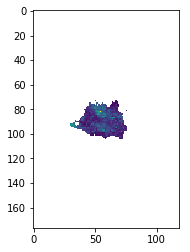

In [48]:
np.size(plotfield)
plt.imshow(plotfield)
plt.show()

#### add geographic information with Basemap

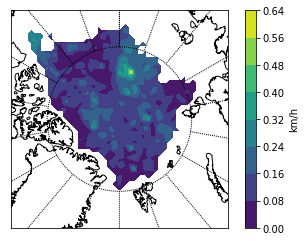

In [258]:
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')
m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
m.contourf(lon_map,lat_map,plotfield)

cbar=plt.colorbar()
cbar.set_label('km/h')
plt.show()

### Compute forward trajectories; class Buoys

In [260]:
class Buoys:
    
    global rad
    rad=np.pi/180.0 # radiant <-> degree
    
    def __init__(self, lon_start, lat_start, earliest_date_of_buoy):
        self.oldlon = lon_start*rad
        self.oldlat = lat_start*rad
        self.lon = lon_start*rad
        self.lat = lat_start*rad
        self.old_u = np.zeros(lon_start.shape)
        self.old_v = np.zeros(lon_start.shape)
        self.date = earliest_date_of_buoy
        self.delta_x = np.zeros(lon_start.shape)
        self.delta_y = np.zeros(lon_start.shape)
        self.u_ice = np.zeros(lon_start.shape)
        self.v_ice = np.zeros(lon_start.shape)
        self.date = earliest_date_of_buoy
        
    def date(self):
        print("The current date is ...")
        
    def trajectory(self, new_u,new_v, delta_t):
        print("Update buoy positions. Integrate for " + str(delta_t/3600.) + " hours.")
        
        r_earth = 6.3675*10**6 # radius of Earth in [m]
        
        #save old position in case the drifter leaves the domain
        self.oldlon = self.lon # radiant
        self.oldlat = self.lat # radiant
        
        #displacement vectors
        deltax1 = self.old_u * delta_t
        deltay1 = self.old_v * delta_t
        deltax2 = new_u * delta_t
        deltay2 = new_v * delta_t
        
        #heun method
        self.lon = self.lon + (0.5*(deltax1 + deltax2) / (r_earth*np.cos(self.lat)) )
        self.lat = self.lat + (0.5*(deltay1 + deltay2) /  r_earth )
        lon_deg=self.lon/rad
        lat_deg=self.lat/rad
        
        #update velocity here (old value was needed for heun method)
        self.old_u=new_u
        self.old_v=new_v
        
        return lon_deg % 360.0, lat_deg % 90.0
        
    def updateforcing(self, u_ice, v_ice):
        print("The new forcing is loaded.")
        
        #(self.lon - lon_start) 
        self.u_ice = u_ice
        self.v_ice = v_ice

    def updateposition(self, delta_t):
        print("Update buoy positions. Integrate for " + str(delta_t/3600.) + " hours.")
        
        self.lon = self.lon + self.u_ice*delta_t
        self.lat = self.lat + self.u_ice*delta_t

### Generate DataFrame of buoy positions and dates

In [457]:
initialdate='2019-07-29 12:00:00'
num_times=10
freq='D'
num_buoys=3

In [459]:
dates = pd.date_range(initialdate, freq=freq, periods=1)
lons = np.zeros((1, num_buoys)) #
lats = np.zeros((1, num_buoys)) #

# generate DataFrame that needs to be filled with positions
lons_df = pd.DataFrame(data=lons, index=dates)
lats_df = pd.DataFrame(data=lats, index=dates)

In [460]:
lons_df.loc[initialdate] = np.array([1.,2.,3.])
lats_df.loc[initialdate] = np.array([84.,85.,86.])

In [461]:
lats_df

,0,1,2
2019-07-29 12:00:00,84.0,85.0,86.0


In [462]:
objects = Buoys(lons_df.loc[initialdate],lats_df.loc[initialdate],initialdate)

In [463]:
#trajectories = list()
#trajectories.append(start_positions)

In [464]:
#appendDF = pd.DataFrame(data=np.array([[1.,2.,3.]]), index=['2019-08-08 12:00:00'])

In [469]:
for i in np.arange(0,num_times):
    #trajectories.append(objects.trajectory(-10.,0.,delta_t=86400)) # U,V,deltaT
    LON,LAT=objects.trajectory(-10.,0.,delta_t=86400)
    lons_df=lons_df.append(LON.rename('2019-08-08 12:00:00'))
    lats_df=lats_df.append(LAT.rename('2019-08-08 12:00:00'))

Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.
Update buoy positions. Integrate for 24.0 hours.


In [470]:
lons_df

,0,1,2
2019-07-29 12:00:00,1.000000,2.000000,3.000000
2019-08-08 12:00:00,323.811997,317.399326,307.274637
2019-08-08 12:00:00,249.435990,228.197979,195.823911
2019-08-08 12:00:00,175.059984,138.996632,84.373184
2019-08-08 12:00:00,100.683977,49.795285,332.922458
2019-08-08 12:00:00,26.307971,320.593938,221.471732
2019-08-08 12:00:00,311.931965,231.392591,110.021006
2019-08-08 12:00:00,237.555958,142.191244,358.570279
2019-08-08 12:00:00,163.179952,52.989897,247.119553
2019-08-08 12:00:00,88.803945,323.788550,135.668827


In [467]:
A

0     14.427939
1    234.587203
2     24.218101
Name: 2019-07-29 12:00:00, dtype: float64

In [468]:
B

0    84.0
1    85.0
2    86.0
Name: 2019-07-29 12:00:00, dtype: float64

In [272]:
trajectories

[(array([1., 2., 3.]), array([84., 85., 86.])),
 (array([323.81199677, 317.39932646, 307.27463688]), array([84., 85., 86.])),
 (array([249.43599032, 228.19797939, 195.82391065]), array([84., 85., 86.])),
 (array([175.05998387, 138.99663232,  84.37318441]), array([84., 85., 86.])),
 (array([100.68397742,  49.79528524, 332.92245818]), array([84., 85., 86.]))]

In [283]:
# first trajectory (and its components)
buoynum=0
trajectories[buoynum] # lon lat
#trajectories[buoynum][0] # lon components
#trajectories[buoynum][1] # lat components

(array([1., 2., 3.]), array([84., 85., 86.]))

#### plot the trajectories 

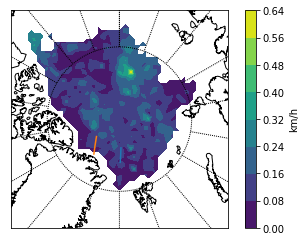

In [282]:
m = Basemap(projection='npstere',boundinglat=75,lon_0=0,resolution='l')
#m = Basemap(projection='robin',boundinglat=40,lon_0=0,resolution='l')

m.drawcoastlines()
#m.fillcontinents(color='0.1',lake_color='lightblue')

# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
#m.drawmapboundary(fill_color='lightblue')

lon_map,lat_map=m(lon_start[:,:],lat_start[:,:])
m.contourf(lon_map,lat_map,plotfield)

for buoynum in np.arange(0,2):
    lon_traj,lat_traj=m(trajectories[buoynum][0],trajectories[buoynum][1])
    m.plot(lon_traj, lat_traj)

cbar=plt.colorbar()
cbar.set_label('km/h')
plt.show()

In [ ]:
trajectories[buoynum][0]

In [149]:
objects.lon/rad, objects.lat/rad

(array([   1.78000536, -196.96110135, -506.91836771]),
 array([116.2104338, 115.2104338, 114.2104338]))

## 

In [65]:
lon=90.
lat=75.

In [66]:
( np.abs(lon - lon_start[:,:]) + np.abs(lat - lat_start[:,:]) ).argmin() # find closest points???

8884

In [232]:
8884/199, lon-lon_start[44,:], lat-lat_start[44,:]

(44, array([263.6598   , 264.1304   , 264.6107   , 265.1009   , 265.6013   ,
        266.1121   , 266.63354  , 267.1659   , 267.7094   , 268.26428  ,
        268.83087  , 269.40936  , 270.       , -89.39691  , -88.78113  ,
        -88.15239  , -87.51045  , -86.85504  , -86.18593  , -85.50285  ,
        -84.80557  , -84.09386  , -83.36749  , -82.626236 , -81.8699   ,
        -81.09828  , -80.31122  , -79.50853  , -78.69006  , -77.85573  ,
        -77.00539  , -76.13898  , -75.25644  , -74.35776  , -73.44293  ,
        -72.51201  , -71.56505  , -70.60219  , -69.623566 , -68.62938  ,
        -67.61986  , -66.59531  , -65.556046 , -64.50244  , -63.43495  ,
        -62.35402  , -61.26021  , -60.154068 , -59.03624  , -57.90741  ,
        -56.768295 , -55.61966  , -54.462326 , -53.29715  , -52.125015 ,
        -50.94687  , -49.76364  , -48.57634  , -47.38594  , -46.193497 ,
        -45.       , -43.806503 , -42.61406  , -41.42366  , -40.23636  ,
        -39.05313  , -37.874985 , -36.702858 , 

In [223]:
#lon_start[8884]
lon_start.flat[8884]

AttributeError: NetCDF: Attribute not found

In [ ]:
Thomas Krumpen:

OSISAF, U V sea ice drift osisaf.met.no ice drift 
Ice concentration + ice drift

Simpel selber machen in python! (allgemein dass auf Eisberg erweiterbar)
Parcels nehmen als Test

Download Thomas‘ Favoriten: Low Resolution Sea Ice Drift
AMSR-2 Global Sea Ice Concentration

Auf jeden Fall täglich auf dem Schiff

Rückwärts rechnen für die 

Meereisportal.de (Datenportal), 30km über ein halbes Jahr Genauigkeit. Alle laden und gut einstellen


Offiziell chief Scientist? Cruise leader

Parallel, sea ice age Karte machen, parallel, Durchmischung, leads, Alleinstellungsmerkmal

MOSAIC school ensemble machen für SiDFex?

DWD forecast available, at ship position, get a file before

Leuten verschiedenen Instrumenten zuordnen, P ist GPS, M mit Landen, L 48 Stunden mit Schiff dran

STAS Kurs für Helikopter, Verena Mohaupt organisiert das, ich würde mal bisschen warten (Du wirst den schon kriegen)

Wladimir Sokolov, AHRI St. Petersburg

Russisch-Kurs von Anne abends, Mottoparties, Gitarre, Ukulele

Social Events vielleicht den Studenten an die Hand geben, Gitarre, Ukulele, …
